# Categorizing the weather


In [1]:
import pandas as pd

In [13]:
weather = pd.read_csv("../dataset/weather.csv")
ri = pd.read_csv("../dataset/police.csv")

weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [3]:
weather.shape

(4017, 27)

In [4]:
weather.columns

Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22'],
      dtype='object')

In [5]:
temp =weather.loc[: , "TAVG":"TMAX"]


In [7]:
temp.shape



(4017, 3)

In [8]:
temp.columns

Index(['TAVG', 'TMIN', 'TMAX'], dtype='object')

In [9]:
temp.head()

,TAVG,TMIN,TMAX
0,44.0,35,53
1,36.0,28,44
2,49.0,44,53
3,42.0,39,45
4,36.0,28,43


In [10]:
 temp.sum()

TAVG     63884.0
TMIN    174677.0
TMAX    246116.0
dtype: float64

In [11]:
temp.sum(axis='rows')

TAVG     63884.0
TMIN    174677.0
TMAX    246116.0
dtype: float64

In [12]:
temp.sum(axis='columns')

0       132.0
1       108.0
2       146.0
3       126.0
4       107.0
        ...  
4012    156.0
4013    114.0
4014    101.0
4015     92.0
4016    124.0
Length: 4017, dtype: float64

In [14]:
ri.stop_duration.unique()


array(['0-15 Min', '16-30 Min', nan, '30+ Min'], dtype=object)

In [15]:
mapping = {'0-15 Min':'short',
           '16-30 Min':'medium', 
           '30+ Min':'long'}

ri['stop_length'] = ri.stop_duration.map(mapping)
ri.stop_length.dtype

dtype('O')

In [16]:
ri.stop_length.unique()

array(['short', 'medium', nan, 'long'], dtype=object)

In [17]:
ri.dropna(subset=['stop_length'], inplace=True)

In [18]:
ri.stop_length.unique()

array(['short', 'medium', 'long'], dtype=object)

In [21]:
ri.stop_length.memory_usage(deep=True)

6068250

In [22]:
cats =pd.CategoricalDtype(['short','medium','long'],  ordered=True)

In [24]:
cats

CategoricalDtype(categories=['short', 'medium', 'long'], ordered=True)

In [25]:
ri['stop_length'] = ri.stop_length.astype(cats)

In [26]:
ri['stop_length']

0         short
1         short
2         short
3        medium
4         short
          ...  
91736     short
91737     short
91738     short
91739     short
91740     short
Name: stop_length, Length: 86539, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

In [27]:
ri.stop_length.memory_usage(deep=True)

779145

In [28]:
ri.stop_length.head()

0     short
1     short
2     short
3    medium
4     short
Name: stop_length, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

In [29]:
ri[ri.stop_length > 'short'].shape

(16960, 16)

In [30]:
ri[ri.stop_length > 'medium'].shape

(3220, 16)

## Counting bad weather conditions


NameError: name 'plt' is not defined

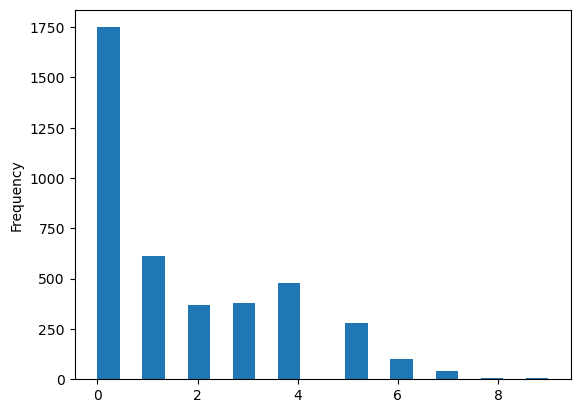

In [31]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'

weather.bad_conditions.plot(kind='hist',bins=20)

# Display the plot
plt.show()


## Rating the weather conditions


In [32]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())


0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


## Changing the data type to category


In [33]:
# Specify the logical order of the weather ratings
cats = pd.CategoricalDtype(['good', 'bad', 'worse'], ordered=True)

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(cats)

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']
